In [13]:
import pandas as pd
import numpy as np
import random
import math
from hashlib import sha256
import time
import matplotlib.pyplot as plt
import secrets


def U(seed):
    random.seed(seed)
    return random.randint(0, 2**32-1)


def generate_fingerprinted_database(R, K, T, Y, L, epsilon, seed):
    # Calculate Bernoulli distribution parameter p
    p = 1 / (math.exp(float(epsilon) / K) + 1)

    # Construct fingerprintable set P
    P = set()
    for i, row in enumerate(R):
        for t in range(len(row)):
            for k in range(len(row[t])):
                P.add((i, t, k))

    # Generate internal ID for SP Step 2
    IDinternal = sha256(Y.encode('utf-8')).hexdigest()

    # Generate fingerprint for SP Step 3
    f = sha256((Y + IDinternal).encode('utf-8')).digest()

    # Convert fingerprint to bit array
    f = np.unpackbits(np.frombuffer(f, dtype=np.uint8))[:L]

    # Generate fingerprinted database
    start_time = time.time()
    count = 0
    random.seed(seed)
    for i, row in enumerate(R):
        for t in range(len(row)):
            for k in range(len(row[t])):
                if (i, t, k) in P:
                    # Set pseudorandom seed
                    s = sha256((Y + str(row[t][k]) + str(random.randint(1, 2 ** 64-1))).encode('utf-8')).hexdigest()
                    # Check if bit is marked for fingerprinting
                    if random.random() <= p:
                        count += 1
                        x = secrets.randbits(1)
                        l = secrets.randbelow(L)
                        B = x ^ f[l]
                        row[t][k] = np.bitwise_xor(row[t][k], np.array([B], dtype=np.uint8)).astype(np.uint8)
    print("Number of times the loop ran with the condition: ", count)
    elapsed_time = time.time() - start_time
    return elapsed_time, R


# Load dataset into pandas dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# Extract features and labels from dataframe
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

# Convert labels to 0s and 1s
y[y == '<=50K'] = 1
y[y == '>50K'] = 0

data = df[:5000].values.tolist()

# Create list of records
R = []
for row in data:
    R_row = []
    # Age
    
    R_row.append([int(row[0])])
    # Workclass
    R_row.append([row[1]])
    # Fnlwgt
    R_row.append([int(row[2])])
    # Education
    R_row.append([row[3]])
    # Education-num
    R_row.append([int(row[4])])
    # Marital-status
    R_row.append([row[5]])
    # Occupation
    R_row.append([row[6]])
    # Relationship
    R_row.append([row[7]])
    # Race
    R_row.append([row[8]])
    # Sex
    R_row.append([row[9]])
    # Capital-gain
    R_row.append([int(row[10])])
    R_row.append([int(row[11])])
    # Hours-per-week
    R_row.append([int(row[12])])
    # Native-country
    R_row.append([row[13]])
    R.append(R_row)

# Generate fingerprinted databases for different epsilon values
# Set seed for pseudorandom number generator
seed = 12345

# Generate fingerprinted databases for different epsilon values
# Generate fingerprinted databases for different epsilon values
K = 8
T = 1
Y = 'mysecretkey'
L = 256
times = []
epsilons = [0.1, 0.5, 1.0]

np.random.shuffle(R)

for epsilon in epsilons:
    start_time = time.time()
    R_fingerprinted = generate_fingerprinted_database(R, K, T, Y, L, epsilon, seed)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
    print(f"Fingerprinted database generated for epsilon={epsilon}: {R_fingerprinted[1]}")

plt.plot(epsilons, times)
plt.xlabel('Epsilon')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Fingerprinting Elapsed Time vs. Epsilon')
plt.show()



TypeError: ignored

Fingerprinting executed 0 times
Fingerprinted database generated for epsilon=0.1: [[['101111'], ['10100010001111000'], ['1101'], ['0'], ['0'], ['111100']], [['11001'], ['100110111111110100'], ['1010'], ['0'], ['0'], ['101010']], [['10111'], ['110000000011010000'], ['1001'], ['0'], ['0'], ['11110']], [['101111'], ['11000010011011101'], ['1010'], ['0'], ['0'], ['101000']], [['100101'], ['1010001100111101010'], ['1001'], ['0'], ['0'], ['101000']], [['101000'], ['101001101000011101'], ['1010'], ['0'], ['0'], ['100110']], [['11101'], ['100111000000011000'], ['1001'], ['110011111101'], ['0'], ['101000']], [['11011'], ['1110010100011110'], ['1011'], ['0'], ['0'], ['101000']], [['10101'], ['1000111111110000101'], ['1010'], ['0'], ['0'], ['11001']], [['10111'], ['1000111000110110000'], ['1001'], ['0'], ['0'], ['101000']], [['100111'], ['101110101010111001'], ['1010'], ['0'], ['0'], ['101000']], [['100110'], ['1111001110001100001'], ['1001'], ['0'], ['0'], ['101000']], [['111101'], ['10011111010

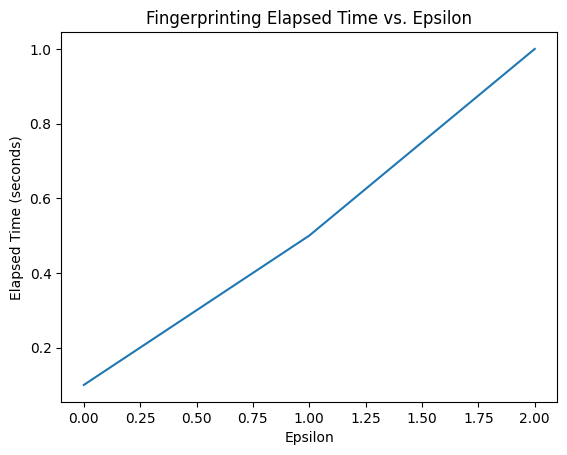

In [21]:
import pandas as pd
import numpy as np
import random
import math
from hashlib import sha256
import time
import matplotlib.pyplot as plt
import secrets


def U(seed):
    random.seed(seed)
    return random.randint(0, 2**32-1)


def generate_fingerprinted_database(R, K, T, Y, L, epsilon):
    # Calculate Bernoulli distribution parameter p
    p = 1 / (math.exp(float(epsilon) / K) + 1)

    # Construct fingerprintable set P
    P = set()
    for i, row in enumerate(R):
        for t in range(len(row)):
            for k in range(len(row[t])):
                P.add((i, t, k))

    # Generate internal ID for SP Step 2
    IDinternal = sha256(Y.encode('utf-8')).hexdigest()

    # Generate fingerprint for SP Step 3
    f = sha256((Y + IDinternal).encode('utf-8')).digest()

    # Convert fingerprint to bit array
    f = np.unpackbits(np.frombuffer(f, dtype=np.uint8))[:L]

    # Generate fingerprinted database
    start_time = time.time()
    count = 0
    for i, row in enumerate(R):
        for t in range(len(row)):
            for k in range(len(row[t])):
                if (i, t, k) in P:
                    # Set pseudorandom seed
                    s = sha256((Y + str(row[t][k]) + str(np.random.randint(1, 2 ** 32))).encode('utf-8')).hexdigest()
                    # Check if bit is marked for fingerprinting
                    if secrets.randbelow(2 ** (K * T * L)) <= 0:
                        count += 1
                        x = secrets.randbits(1)
                        l = secrets.randbelow(L)
                        B = x ^ f[l]
                        row[t][k] ^= B
    elapsed_time = time.time() - start_time
    print(f"Fingerprinting executed {count} times")
    return elapsed_time, R



# Load dataset into pandas dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# Extract features and labels from dataframe
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

# Convert labels to 0s and 1s
y[y == '<=50K'] = 1
y[y == '>50K'] = 0

data = df[:5000].values.tolist()

# Create list of records
R = []
for row in data:
    R_row = []
    # Age
    R_row.append([bin(int(row[0]))[2:]])
    R_row.append([bin(int(row[2]))[2:]])
    R_row.append([bin(int(row[4]))[2:]])
    R_row.append([bin(int(row[10]))[2:]])
    R_row.append([bin(int(row[11]))[2:]])
    R_row.append([bin(int(row[12]))[2:]])
    R.append(R_row)

# Generate fingerprinted databases for different epsilon values
K = 8
T = 1
Y = 'mysecretkey'
L = 256
times = []
epsilons = [0.1, 0.5, 1.0]

np.random.shuffle(R)


for epsilon in epsilons:
    elapsed_time, R_fingerprinted = generate_fingerprinted_database(R, K, T, Y, L, epsilon)
    times.append(elapsed_time)
    print(f"Fingerprinted database generated for epsilon={epsilon}: {R_fingerprinted}")


plt.plot(epsilons)
plt.xlabel('Epsilon')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Fingerprinting Elapsed Time vs. Epsilon')
plt.show()

